In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Rahulrex069/Datatrained-Projects/main/Evaluation%20Project%20Week%202/cencus_income.csv')
df.head(50)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [3]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

There is a problem of class imbalance, so we will use SMOTE to balance the dataset down the line.

In [4]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no missing values in the dataset.

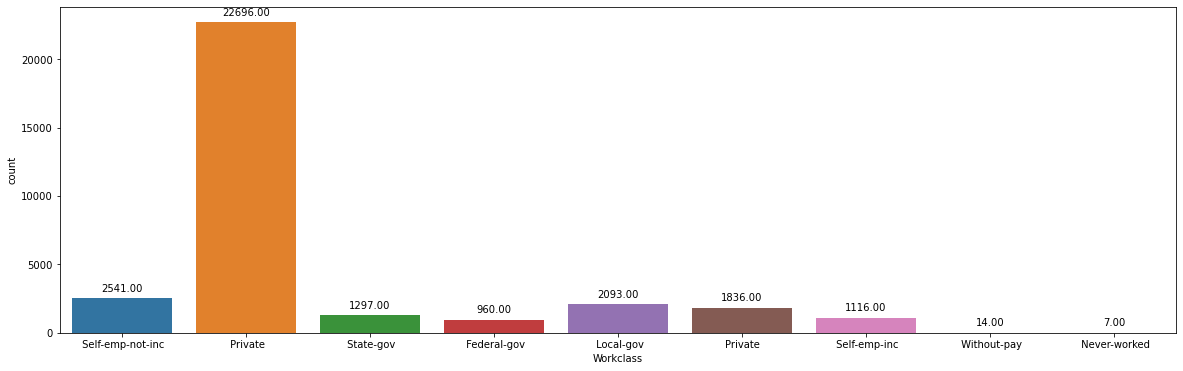

In [5]:
plt.figure(figsize=[20,6])
workclass =sns.countplot(data=df, x= 'Workclass')
for p in workclass.patches:
    workclass.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

The Highest number of people are working in the private sector as per the given dataset.

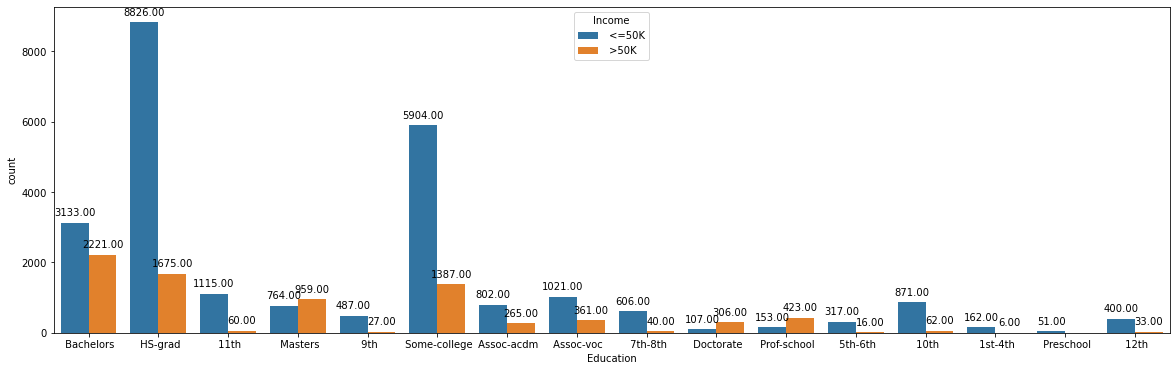

In [6]:
plt.figure(figsize=[20,6])
education =sns.countplot(data=df, x= 'Education', hue='Income')
for p in education.patches:
    education.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Higher studies makes the differnce, which is proved by the above plot. As we an see, people who have done their masters and Bechalors are on their way to cross 50K mark, hence the difference is much more lesser than the other education qualifications.

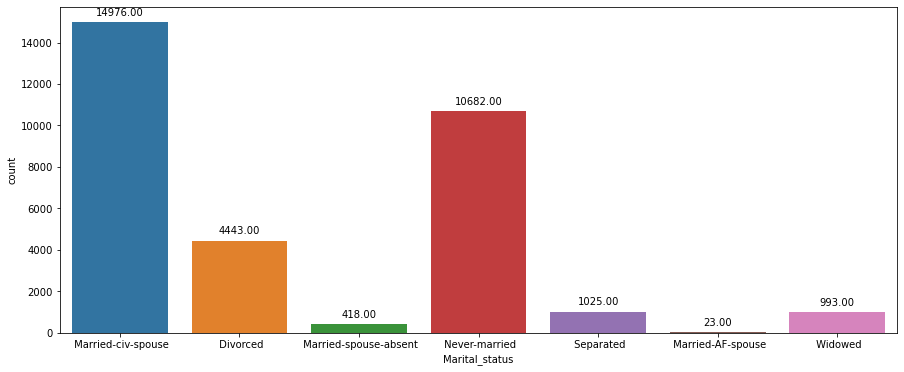

In [7]:
plt.figure(figsize=[15,6])
marital_status =sns.countplot(data=df, x= 'Marital_status')
for p in marital_status.patches:
    marital_status.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

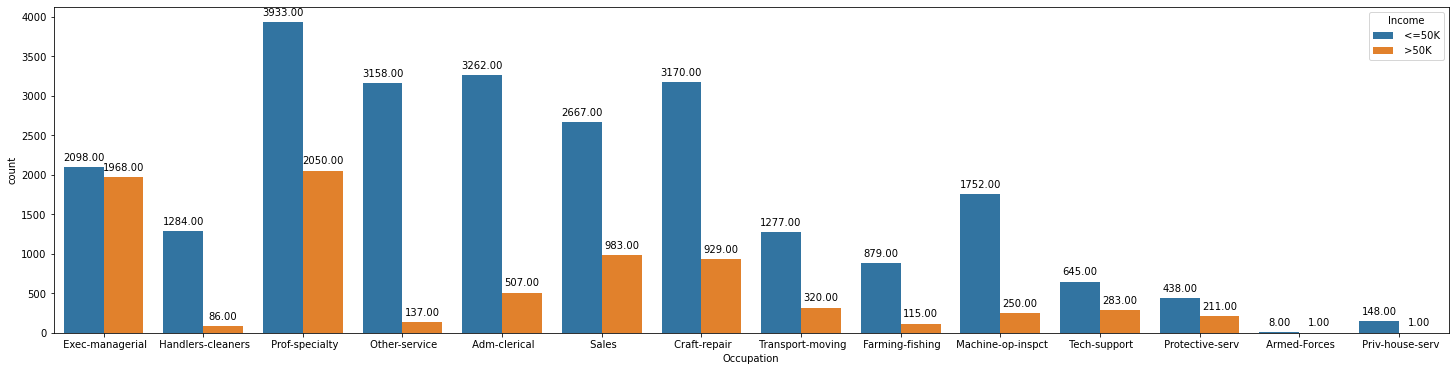

In [8]:
plt.figure(figsize=[25,6])
occupation =sns.countplot(data=df, x= 'Occupation', hue='Income')
for p in occupation.patches:
    occupation.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

1. As plot shows number of people who are at Executive managerial level are almost same in both cases <=50K and >=50k. This means those who are <=50k will sooner cross the mark. same goes for the prof-speciality people.
2. In case of other occupation we can see that there is big differece in the numbers, especially in other-service and adm-clerical. Meaning these occupation have the least chances of crossing the 50k mark any time sooner.

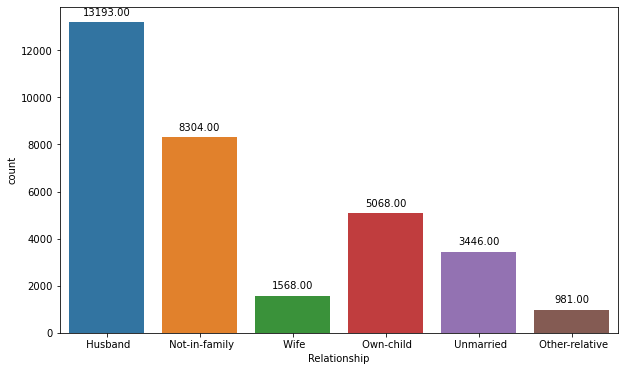

In [9]:
plt.figure(figsize=[10,6])
relationship =sns.countplot(data=df, x= 'Relationship')
for p in relationship.patches:
    relationship.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

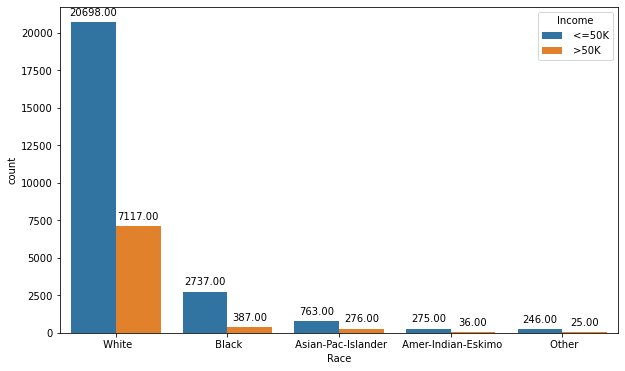

In [10]:
plt.figure(figsize=[10,6])
race =sns.countplot(data=df, x= 'Race', hue='Income')
for p in race.patches:
    race.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

1. 85% of the overall data consist of white people.
2. In all races, number of people having <=50K are much more higher.

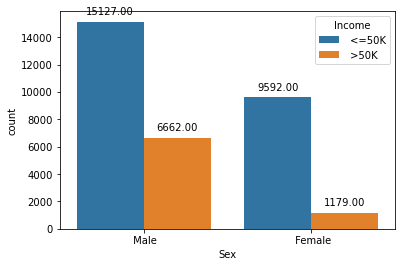

In [11]:
sex =sns.countplot(data=df, x= 'Sex', hue='Income')
for p in sex.patches:
    sex.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In both sex, the number of people having <=50K are much higher compared to >=50K

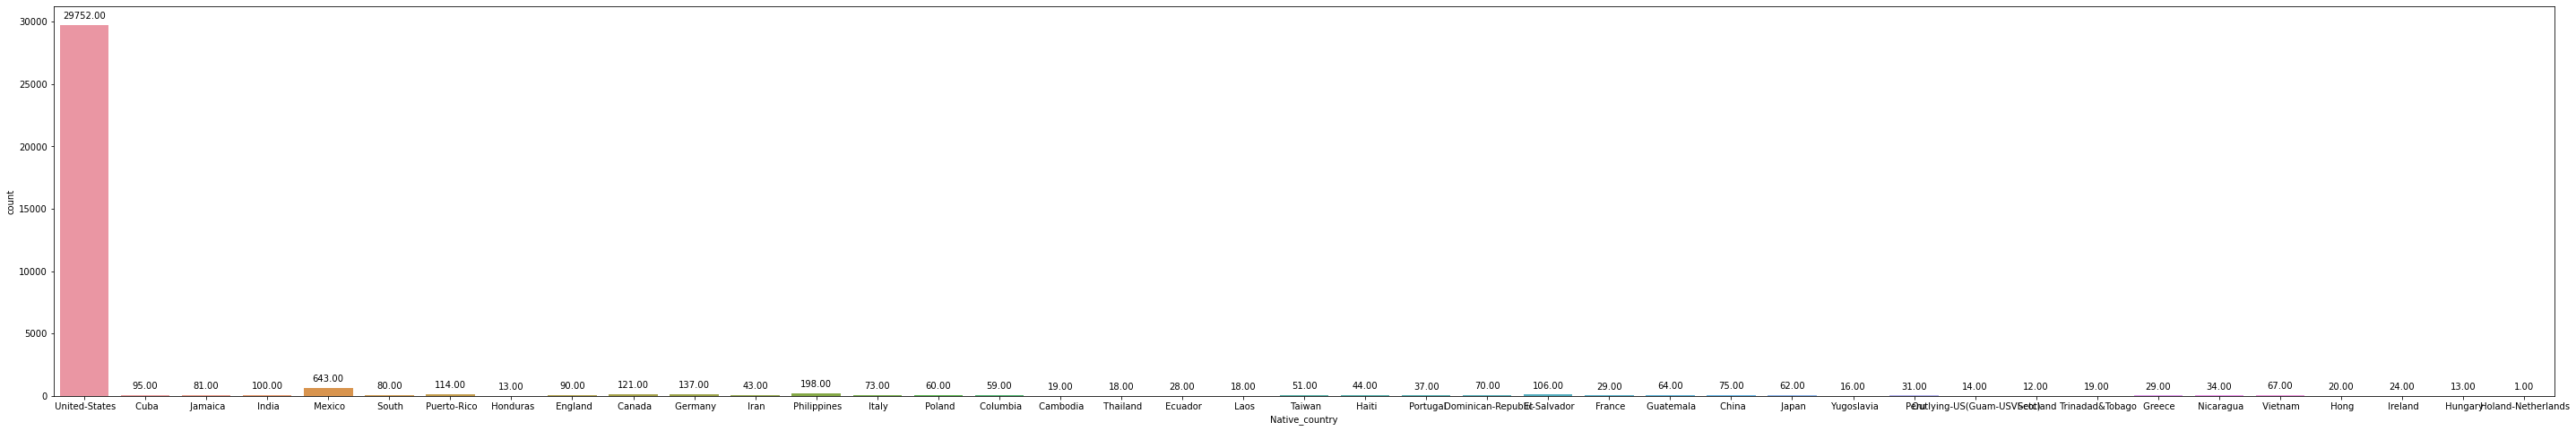

In [12]:
plt.figure(figsize=[50,8])
native_country =sns.countplot(data=df, x= 'Native_country')
for p in native_country.patches:
    native_country.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

1. Majority of the data is actually taken from United states. 

In [13]:
import dtale
dtale.show(df)

2021-11-02 18:48:29,916 - INFO     - NumExpr defaulting to 8 threads.


In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


1. Mean age in Age column is 38.58 where minimum age is 17 and maximum age is 90.
2. Hours per week has the mean hours of 40.43 where minimum hours are 1 and maximum are 99.

<AxesSubplot:>

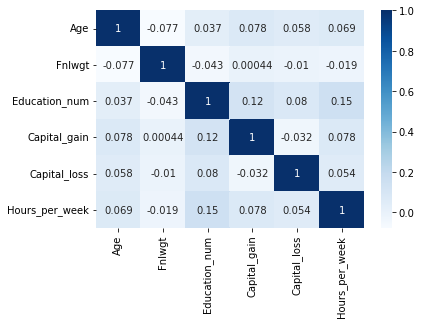

In [15]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

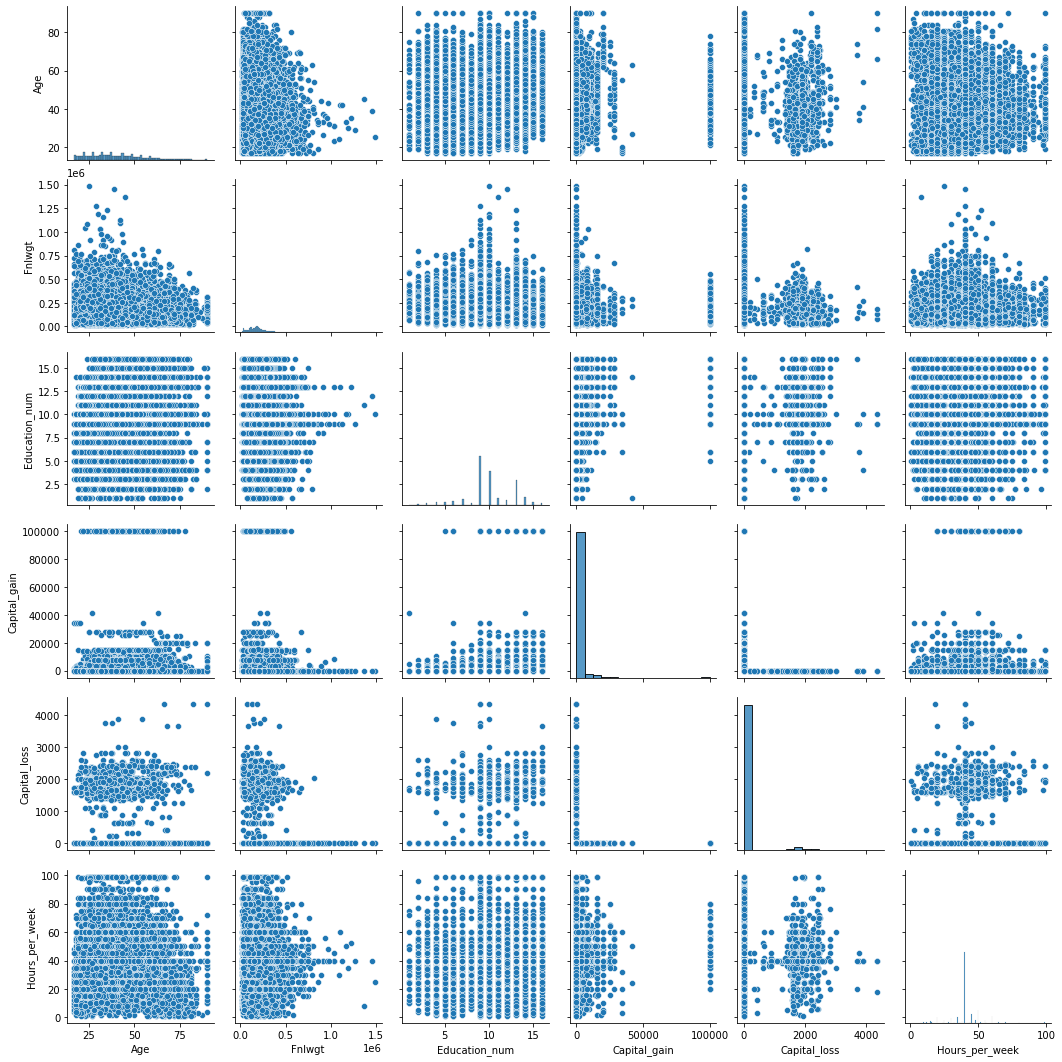

In [16]:
sns.pairplot(df)

In [17]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['Workclass'] = LE.fit_transform(df['Workclass'])
df['Education'] = LE.fit_transform(df['Education'])
df['Marital_status'] = LE.fit_transform(df['Marital_status'])
df['Occupation'] = LE.fit_transform(df['Occupation'])
df['Relationship'] = LE.fit_transform(df['Relationship'])
df['Race'] = LE.fit_transform(df['Race'])
df['Sex'] = LE.fit_transform(df['Sex'])
df['Native_country'] = LE.fit_transform(df['Native_country'])
df['Income'] = LE.fit_transform(df['Income'])

df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Native_country', ylabel='Density'>

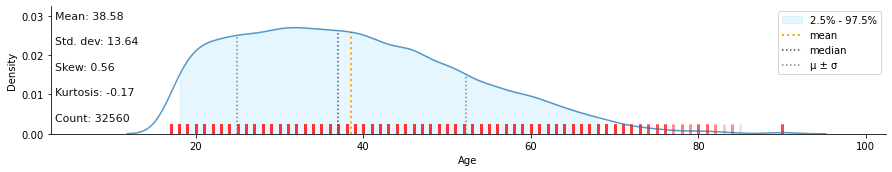

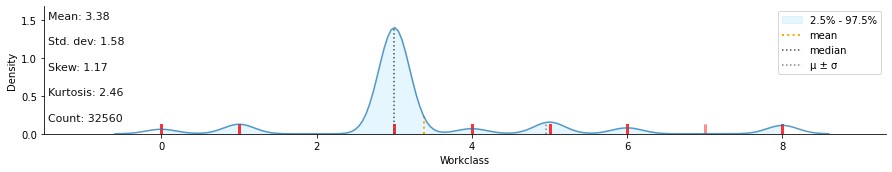

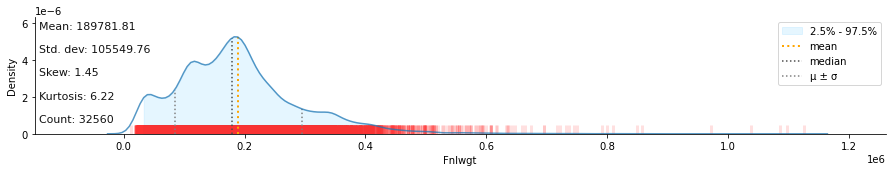

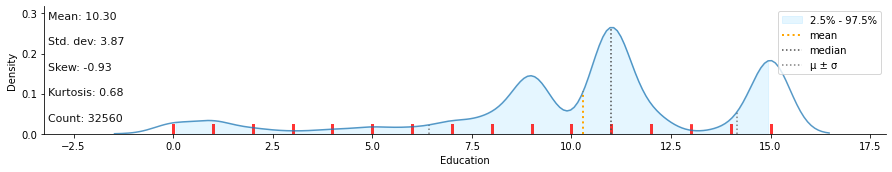

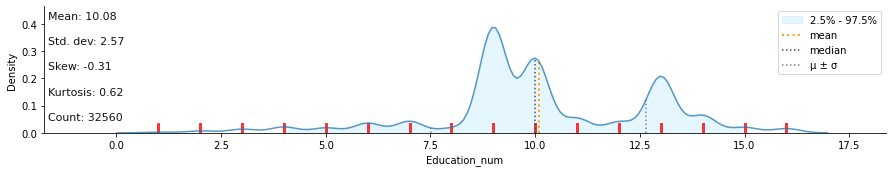

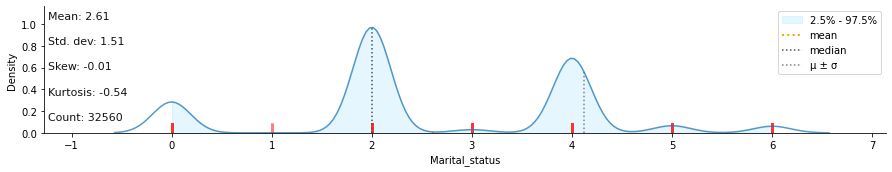

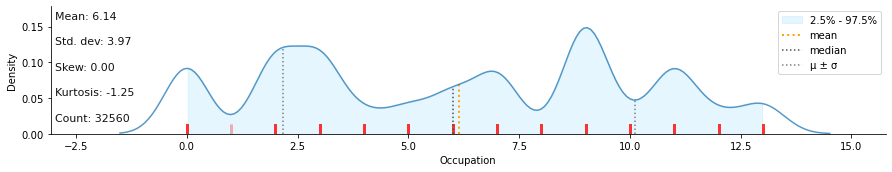

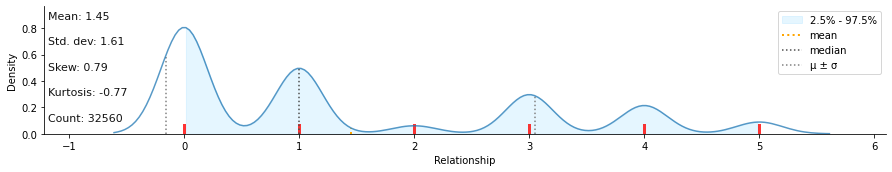

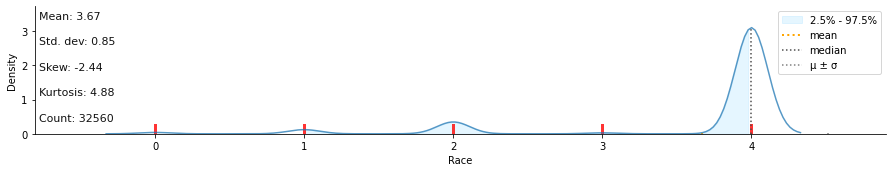

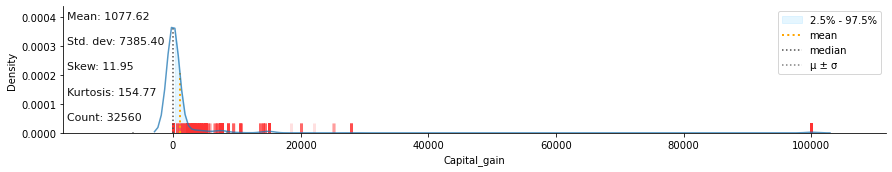

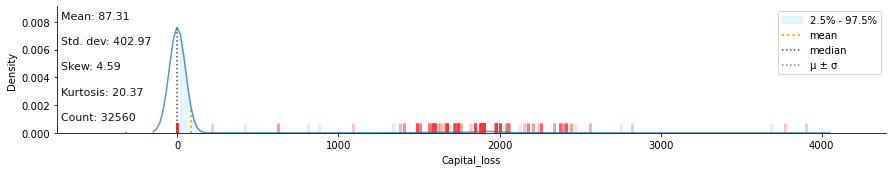

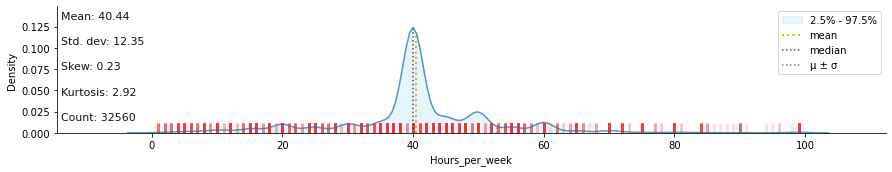

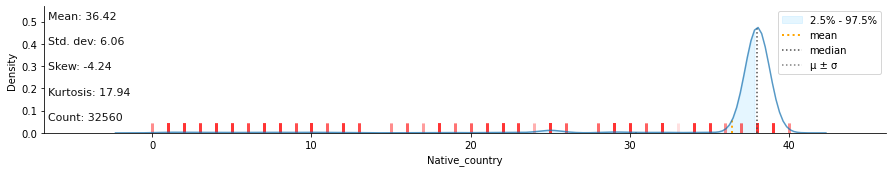

In [18]:
import klib
klib.dist_plot(df)

In [19]:
df.skew()

Age                0.558738
Workclass          1.167293
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.000536
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.243083
Income             1.212383
dtype: float64

As we can see, Capital_gain and Capital_loss has the highest skewness. So let us check the outliers and if we can afford, we will get rid of them.

In [20]:
from scipy.stats import zscore
z=np.abs(zscore(df))

threshold=3
print(np.where(z>3))

df_new=df[(z<3).all(axis=1)]
df_new

(array([    3,     9,    10, ..., 32532, 32550, 32552]), array([13, 12,  8, ...,  8,  8,  8]))


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
5,49,3,160187,6,5,3,7,1,2,0,0,0,16,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


When i tried to get the outliers and checked how much data we will loose, the result is 17%, which is extremely high. Hence I have to continue with the old dataset.

In [21]:
dfx = df.iloc[:,:-1]
dfx

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,12,5,4,0,0,0,38,38
32556,40,3,154374,11,9,2,6,0,4,1,0,0,40,38
32557,58,3,151910,11,9,6,0,4,4,0,0,0,40,38
32558,22,3,201490,11,9,4,0,3,4,1,0,0,20,38


In [22]:
dfy = df.iloc[:,-1:]
dfy

,Income
0,0
1,0
2,0
3,0
4,0
...,...
32555,0
32556,1
32557,0
32558,0


In [23]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [24]:
trainx, trainy = sm.fit_resample(dfx, dfy)

In [25]:
trainx.shape

(49438, 14)

In [26]:
trainy.shape

(49438, 1)

In [27]:
from sklearn.preprocessing import power_transform
data = power_transform(trainx, method = "yeo-johnson")
data

array([[ 0.8049215 ,  1.1959115 , -1.09940018, ..., -0.26197205,
        -2.4682993 ,  0.31520643],
       [-0.11692018, -0.08496535,  0.40270155, ..., -0.26197205,
        -0.18446956,  0.31520643],
       [ 1.01838263, -0.08496535,  0.56750688, ..., -0.26197205,
        -0.18446956,  0.31520643],
       ...,
       [-0.28331404, -0.08496535,  0.14844685, ..., -0.26197205,
         0.51534191,  0.31520643],
       [ 0.58529355, -0.08496535, -0.81933188, ..., -0.26197205,
        -0.96135768,  0.31520643],
       [ 0.35891738, -0.08496535, -0.71511391, ..., -0.26197205,
        -0.18446956,  0.31520643]])

In [28]:
x = pd.DataFrame(data)
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.804922,1.195911,-1.099400,-0.536155,1.071220,-0.239951,-0.769637,-0.895283,0.422731,0.668386,-0.383961,-0.261972,-2.468299,0.315206
1,-0.116920,-0.084965,0.402702,0.099737,-0.656594,-1.954260,-0.203422,0.559336,0.422731,0.668386,-0.383961,-0.261972,-0.184470,0.315206
2,1.018383,-0.084965,0.567507,-2.245926,-1.401557,-0.239951,-0.203422,-0.895283,-2.404524,0.668386,-0.383961,-0.261972,-0.184470,0.315206
3,-0.997107,-0.084965,1.349090,-0.536155,1.071220,-0.239951,0.795329,1.571462,-2.404524,-1.496141,-0.383961,-0.261972,-0.184470,-3.293353
4,-0.199587,-0.084965,0.964249,0.444190,1.548116,-0.239951,-0.769637,1.571462,0.422731,-1.496141,-0.383961,-0.261972,-0.184470,0.315206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49433,0.947882,-0.084965,-0.500273,-0.227239,1.071220,-0.239951,-0.478826,-0.895283,0.422731,0.668386,2.605455,-0.261972,0.868047,0.315206
49434,-0.035272,-0.084965,0.224410,-0.536155,1.071220,-1.043190,0.795329,0.559336,0.422731,0.668386,2.605455,-0.261972,-0.271372,0.315206
49435,-0.283314,-0.084965,0.148447,1.183510,-0.656594,-0.239951,-1.081020,-0.895283,0.422731,0.668386,-0.383961,-0.261972,0.515342,0.315206
49436,0.585294,-0.084965,-0.819332,-0.227239,-0.656594,-0.239951,0.557798,-0.895283,0.422731,0.668386,-0.383961,-0.261972,-0.961358,0.315206


In [29]:
x.skew()

0    -0.024177
1     0.157487
2     0.020044
3    -0.188917
4     0.003149
5    -0.002055
6    -0.209792
7     0.360449
8    -1.946907
9    -0.827780
10    2.220543
11    3.555337
12    0.267404
13   -2.802203
dtype: float64

As i could not remove the outliers, i have transformed the dataset and as the result the skewness in the data has reduced.

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [31]:
x = sc.fit_transform(x)
x

array([[ 0.8049215 ,  1.1959115 , -1.09940018, ..., -0.26197205,
        -2.4682993 ,  0.31520643],
       [-0.11692018, -0.08496535,  0.40270155, ..., -0.26197205,
        -0.18446956,  0.31520643],
       [ 1.01838263, -0.08496535,  0.56750688, ..., -0.26197205,
        -0.18446956,  0.31520643],
       ...,
       [-0.28331404, -0.08496535,  0.14844685, ..., -0.26197205,
         0.51534191,  0.31520643],
       [ 0.58529355, -0.08496535, -0.81933188, ..., -0.26197205,
        -0.96135768,  0.31520643],
       [ 0.35891738, -0.08496535, -0.71511391, ..., -0.26197205,
        -0.18446956,  0.31520643]])

In [33]:
maxscore=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,trainy,test_size=0.3, random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxscore:
        maxscore=acc
        maxRS=i
print("Best accuracy score we can achive is  ", maxscore, 'at an ideal Random state ', maxRS)

Best accuracy score we can achive is   0.857470334412082 at an ideal Random state  127


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,trainy,test_size=0.3, random_state=127)

In [35]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(), RandomForestClassifier(),LogisticRegression()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    m_pred=m.predict(x_test)
    print('accuracy_score of',m,"is:")
    print(accuracy_score(y_test,m_pred))
    print(confusion_matrix(y_test,m_pred))
    print(classification_report(y_test,m_pred))
    print("\n")

accuracy_score of DecisionTreeClassifier() is:
0.852953074433657
[[6176 1178]
 [1003 6475]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      7354
           1       0.85      0.87      0.86      7478

    accuracy                           0.85     14832
   macro avg       0.85      0.85      0.85     14832
weighted avg       0.85      0.85      0.85     14832



accuracy_score of SVC() is:
0.8479638619201726
[[5891 1463]
 [ 792 6686]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      7354
           1       0.82      0.89      0.86      7478

    accuracy                           0.85     14832
   macro avg       0.85      0.85      0.85     14832
weighted avg       0.85      0.85      0.85     14832



accuracy_score of KNeighborsClassifier() is:
0.8473570658036678
[[6054 1300]
 [ 964 6514]]
              precision    recall  f1-score   support

           0       0.86      0

In [36]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
for i in model:
    kfold=KFold(5)
    score=cross_val_score(i,x,trainy,cv=kfold)
    print(i, "CV Score is ",score.mean())

DecisionTreeClassifier() CV Score is  0.8464164189647221
SVC() CV Score is  0.826633509220535
KNeighborsClassifier() CV Score is  0.8266532304523313
RandomForestClassifier() CV Score is  0.8880641642960272
LogisticRegression() CV Score is  0.731764877582704


When i compared CV score with the accuracy scores of each model, DecisionTreeClassifier and RandomForestClassifier has no differece at all. Hence i Will go with RandomForestClassifier and perform hypertuning on it to impove the model further.

In [37]:
parameters = {'n_estimators' : np.arange(1,20),
             'max_features' : ["auto","sqrt","log2"],
             'min_samples_split': np.arange(1,20),
             'bootstrap' : [True, False],
             'oob_score' : [True, False] }

In [38]:
from sklearn.model_selection import GridSearchCV
GSV = GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GSV.fit(x_train,y_train)

Executing shutdown due to inactivity...


2021-11-02 19:56:20,581 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2021-11-02 19:56:20,602 - INFO     - Executing shutdown...


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'oob_score': [True, False]})

In [39]:
GSV.best_params_

{'bootstrap': False,
 'max_features': 'log2',
 'min_samples_split': 16,
 'n_estimators': 17,
 'oob_score': False}

In [40]:
Final_model = RandomForestClassifier(bootstrap= False, max_features= 'log2', min_samples_split= 16, n_estimators= 17, oob_score=False)
Final_model.fit(x_train,y_train)
Final_model.score(x_train,y_train)
pred=Final_model.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

89.18554476806904
[[6527  827]
 [ 777 6701]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7354
           1       0.89      0.90      0.89      7478

    accuracy                           0.89     14832
   macro avg       0.89      0.89      0.89     14832
weighted avg       0.89      0.89      0.89     14832



With the help of hyper parameter tuning we have achieved accuracy score of 90%.

In [41]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [42]:
y_pred_prob=Final_model.predict_proba(x_test)[:,1]
y_pred_prob

array([0.02941176, 0.91835093, 0.46948395, ..., 0.05      , 0.64590361,
       0.75894204])

AUC_ROC Score =  0.8918197031299063


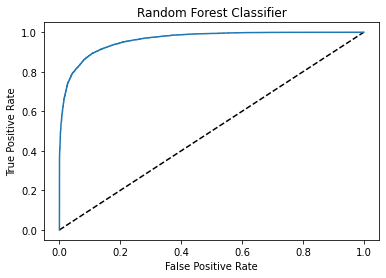

In [43]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()
auc_score=roc_auc_score(y_test,Final_model.predict(x_test))
print('AUC_ROC Score = ',auc_score)

In [44]:
import joblib
joblib.dump(Final_model,'census_income_.obj')

['census_income_.obj']